# TP Algorithme de Dijkstra
L'objectif de ce TP est d'implémenter l'algorithme de Dijkstra vu en cours, dans le but de l'appliquer sur un problème concret : calculer le meilleur itinéraire entre deux points d'une ville, et l'afficher sur une carte.

## Exercice 1 : Algorithme de Dijkstra
Ecrivez une fonction `dijkstra(G, s, d)` qui prend un graphe pondéré en entrée, et calcule le plus court chemin du sommet source `s` vers le sommet destination `d`. Votre fonction doit retourner la longueur de l'itinéraire (en m) ainsi que la liste des sommets permettant de reconstituer l'itinéraire.

In [1]:
import networkx as nx
import numpy as np
import random as rd

G = nx.gnm_random_graph(10, 15, seed=2)
while not nx.is_connected(G):
    G = nx.gnm_random_graph(10, 15, seed=2)

for a,b,c in G.edges(data=True):
    G[a][b]['weight'] = rd.randint(0,10)

def dijkstra(G, s, d):
    weights = [9999 for i in G.nodes()]
    parents = [None for i in G.nodes()]
    visited= [False for i in range(len(weights))]
    weights[s] = 0
    node = s
    while node != None and not visited[node]:
        visited[node] = True
        for neighbor in nx.neighbors(G, node):
            weight = G.get_edge_data(node, neighbor)["weight"]
            if weights[neighbor] > weight + weights[node]:
                  weights[neighbor] = weight + weights[node]
                  parents[neighbor] = node
        min_weight = 9999
        min_index = -1
        for index in range(len(weights)):
            if weights[index] < min_weight and not visited[index]:
                min_weight = weights[index]
                min_index = index
        prev = node
        if min_index == -1: 
            node = None
        else:
            node = list(G.nodes())[min_index]
    path = []
    current = d
    while current != None:
      path.append(current)
      current = parents[current]  
    path.reverse()
    return weights[d], path

    
A = dijkstra(G, 3, 6)
print(A)

(13, [3, 9, 0, 2, 8, 6])


## Exercice 2 : Application au calcul d'itinéraire
[OSMnx](https://geoffboeing.com/2016/11/osmnx-python-street-networks/) est un package Python permettant d'exploiter au format NetworkX les données disponibles sur [OpenStreetMap](https://openstreetmap.org). Il permet notamment de récupérer toutes les informations du réseau routier, piéton, de transports en commun, etc. et de le manipuler avec NetworkX. De nombreux exemples sont disponibles [sur cette page](https://github.com/gboeing/osmnx-examples).

Google Colaboratory permet d'exécuter des notebooks sur lesquels OSMnx et toutes ses dépendances sont installées.

**Note** : Vous pouvez aussi bien sûr travailler en local, mais il vous faudra installer OSMnx et toutes ses dépendances.

On commence par installer la librairie OSMnx :

In [2]:
!apt install libspatialindex-dev
!pip install osmnx
!pip install scipy
!pip install folium

E: Impossible d'ouvrir le fichier verrou /var/lib/dpkg/lock-frontend - open (13: Permission non accordée)
E: Impossible d'obtenir le verrou de dpkg (/var/lib/dpkg/lock-frontend). Avez-vous les droits du superutilisateur ?


On importe ensuite les paquets nécessaires :

In [3]:
import networkx as nx
import osmnx as ox
import scipy as sp

%matplotlib inline
ox.config(log_console=True)

2022-04-06 22:46:47 Configured OSMnx 1.1.2
2022-04-06 22:46:47 HTTP response caching is on


Affichez le réseau routier de Lyon :

2022-04-06 22:46:48 Retrieved response from cache file "cache/a1f737f8e2a328939745245778f3acca85f99bdd.json"
2022-04-06 22:46:48 Created GeoDataFrame with 1 rows from 1 queries
2022-04-06 22:46:48 Constructed place geometry polygon(s) to query API
2022-04-06 22:46:48 Projected GeoDataFrame to +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-04-06 22:46:48 Projected GeoDataFrame to epsg:4326
2022-04-06 22:46:48 Projected GeoDataFrame to +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-04-06 22:46:48 Projected GeoDataFrame to epsg:4326
2022-04-06 22:46:48 Requesting data within polygon from API in 1 request(s)


/home/user/.local/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


2022-04-06 22:46:48 Retrieved response from cache file "cache/55c62d34954e38f5eb2c45fa9566afdb7a4e1cfa.json"
2022-04-06 22:46:48 Got all network data within polygon from API in 1 request(s)
2022-04-06 22:46:48 Creating graph from downloaded OSM data...
2022-04-06 22:46:49 Created graph with 38871 nodes and 56917 edges
2022-04-06 22:46:49 Added length attributes to graph edges
2022-04-06 22:46:49 Identifying all nodes that lie outside the polygon...
2022-04-06 22:46:50 Created nodes GeoDataFrame from graph
2022-04-06 22:46:50 Created r-tree spatial index for 38871 geometries
2022-04-06 22:46:51 Identified 37025 geometries inside polygon
2022-04-06 22:46:51 Removed 1846 nodes outside polygon
2022-04-06 22:46:51 Truncated graph by polygon
2022-04-06 22:46:51 Begin topologically simplifying the graph...
2022-04-06 22:46:51 Identified 6064 edge endpoints
2022-04-06 22:46:53 Simplified graph: 37025 to 6064 nodes, 53679 to 12131 edges
2022-04-06 22:46:53 Identifying all nodes that lie outside

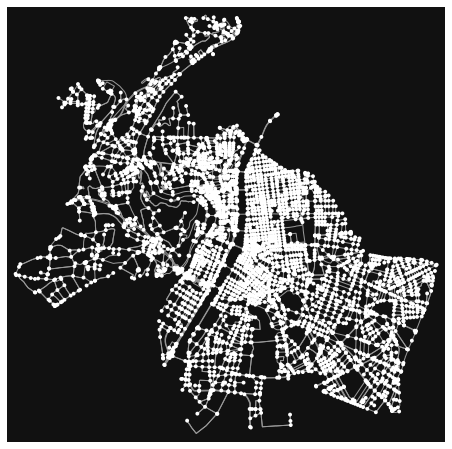

2022-04-06 22:46:55 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
gdf = ox.graph_from_place('Lyon, France', network_type = "drive")
ox.plot_graph(gdf)

Par défaut, les sommets sont affichés ; quand ils sont trop nombreux, ils nuisent à la lisibilité du graphe. Affichez de nouveau le réseau routier, en jaune, dans une image de taille 10x10, et sans afficher les sommets.

2022-04-06 22:46:55 Begin plotting the graph...
2022-04-06 22:46:56 Created edges GeoDataFrame from graph
2022-04-06 22:46:56 Created nodes GeoDataFrame from graph


KeyboardInterrupt: 

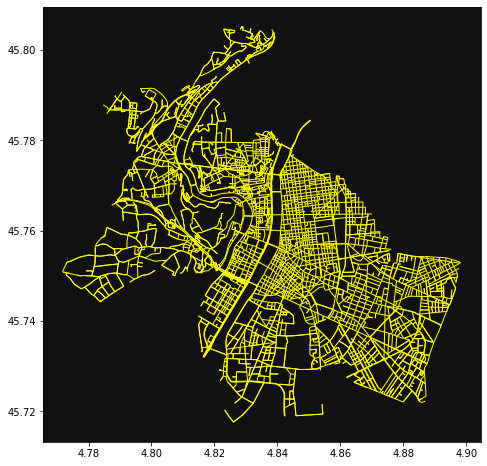

In [5]:
ox.plot_graph(gdf,edge_color="yellow",node_color="None")

Combien de sommets et d'arêtes ce graphes comporte-t-il ?

In [ ]:

print("Nombre de sommets du graphe :", ox.stats.intersection_count(G=gdf, min_streets=1))

print("Nombre d'arêttes du graphe :", ox.stats.streets_per_node_counts(G=gdf))
total = 0
for val in ox.stats.streets_per_node_counts(G=gdf).items():
    total += val[0] * val[1]

print(total)

Nombre de sommets du graphe : 4269
Nombre d'arêttes du graphe : {0: 0, 1: 288, 2: 82, 3: 2580, 4: 1262, 5: 50, 6: 5, 7: 1, 8: 1}
13535


2022-04-06 10:28:53 Created edges GeoDataFrame from graph


ImportError: folium must be installed to use this optional feature

Superposez le réseau routier sur une carte de Lyon (il existe une fonction d'affichage d'OSMnx pour ça ;)) ; faites-en sorte que le nom d'une route soit affiché quand on clique dessus.

In [ ]:
ox.folium.plot_graph_folium(G=gdf)


A présent, l'idée est de déterminer le plus court chemin entre les deux points géographiques fournis, à l'aide de l'algorithme de Dijkstra codé ci-dessus, et de l'afficher sur la carte.

Les numéros des sommets donnés par OpenStreetMap sont ceux de sa base de données *mondiale*, et ne sont donc pas très pratiques si on veut gérer des tableaux de sommets et repérer ces derniers par leur index. Commencez par *réétiqueter* les sommets, de sortes qu'ils soient numérotés `0, 1, 2...`

La fonction `get_nearest_node` renvoie le sommet / noeud du graphe le plus proche des coordonnées géographiques (latitude, longitude) données en paramètre. Récupérez les coordonnées des deux points géographiques fournis (via Google Maps, ou [OpenStreetMap](https://www.openstreetmap.org) en faisant un clic-droit puis *Affichez l'adresse*) et affichez les numéros des sommets les plus proches.

Appliquez votre fonction `dijkstra` aux deux sommets du graphe, puis superposez en rouge l'itinéraire obtenu :

Appliquez le réétiquetage inverse au chemin obtenu pour retrouver les ID uniques des sommets OpenStreetMap :

Enfin, envoyez le chemin obtenu pour l'afficher sur la carte commune, en remplissant votre nom et le nom de la variable content le chemin calculé (liste d'entiers, correspondants aux ID des noeuds OpenStreetMap) :

In [ ]:
#@title Soumission du chemin
Votre_Nom = "" #@param {type:"string"}
Nom_Variable_Chemin = "" #@param {type:"string"}

import requests
import urllib.parse
import json

# Soumission du chemin
def submit_path(name, path):
  if not name:
    raise Exception("Le nom ne doit pas être vide")
  if not isinstance(path, list):
    raise Exception("Le chemin doit être une liste")
  if not all(node in G.nodes() for node in path):
    raise Exception("Le chemin doit être une liste de noeuds uniquement")
  if len(path) == 0:
    raise Exception("Le chemin soumis semble vide")
  if len(path) > 1000:
    raise Exception("Le chemin soumis semble trop grand")

  url = "https://3uh5.short.gy/F5Ki4h?name=" + urllib.parse.quote(name) + "&path=" + urllib.parse.quote(json.dumps(path))
  if requests.request("GET", url).status_code == 200:
    print("🎉 Chemin envoyé avec succès !")
  else:
    raise Exception("Echec lors de l'envoi du chemin")

submit_path(Votre_Nom, eval(Nom_Variable_Chemin))